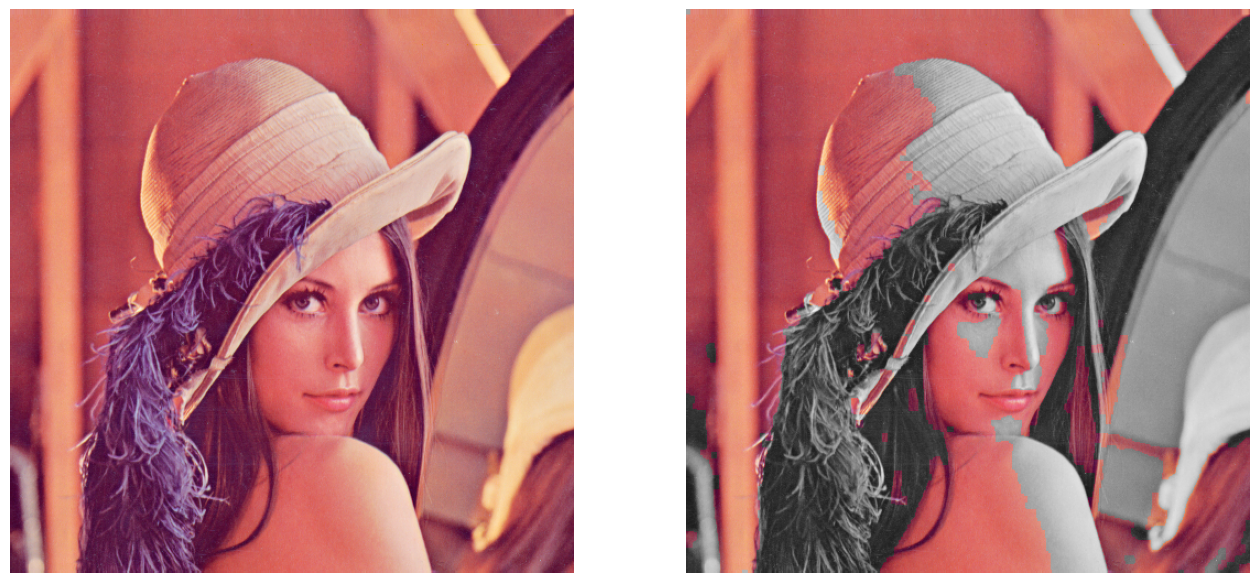

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("mm.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Red
lower_red1 = np.array([0, 120, 70]); upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70]); upper_red2 = np.array([180, 255, 255])

# Green
lower_green = np.array([35, 40, 40]); upper_green = np.array([90, 255, 255])

# Blue
lower_blue = np.array([94, 80, 2]); upper_blue = np.array([126, 255, 255])

mask_red = cv2.inRange(hsv, lower_red1, upper_red1) + cv2.inRange(hsv, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

final_mask = cv2.bitwise_or(mask_red, cv2.bitwise_or(mask_green, mask_blue))

kernel = np.ones((5,5), np.uint8)
final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel)
final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_OPEN, kernel)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
result = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

result[final_mask == 255] = img[final_mask == 255]

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1); plt.imshow(img); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(result); plt.axis('off')
plt.show()

